# 1. Structural analysis

In [1]:
from utils import Helix
from utils_peldor import labels_dist

In [2]:
import py3Dmol
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [3]:
# clear contents of scratch directory 
! rm pdbs/*.*

### Experimental PELDOR distances

In [4]:
#Marko  JACS 2011 (label=1)
exp_id_dna   = [4,5,6,7,8,9,10,11,12,13,14]
exp_dist_dna = [20.1,23.8,25.4,26.6,28.4,30,32.2,34.1,38.3,42.9,45.0]

#Halbmair Chem Science 2016 (label=3)
exp_id_rna_long   = [10,15,18,22,25,28] #16,24,28,31
exp_dist_rna_long = [30.7,43.2,53.3,63.2,73.,81.]

#Max unpublished (label=1)
exp_id_rna   = [7,8,9,10,11,12,13,14]
exp_dist_rna = [21.2,23.2,26.6,28.7,31.0,33.6,36.2,38.1]

#label = 2
exp_id_dna_2 = [8]
exp_dist_dna_2 = [31.2]

exp_id_rna_2 = [11]
exp_dist_rna_2 = [30.3]

### Provide sequence of the first helix strand
A,C,G,T: regular bases

c, g   : spin label 

In [5]:
#Marko JACS 2011 and Max unpublished (label=1)
sequence_evn = 'GTcAGTCgCgCgCgCgCATC'
sequence_odd = 'GTcAGTgCgCgCgCgCgATC'

#Max unpublished (label=1)
sequence_evn_rna = sequence_evn.replace('T','U')
sequence_odd_rna = sequence_odd.replace('T','U')

#Halbmair Chem Science 2016 (label=3)
sequence_6 = 'GACGUcGGAAGACGUcAGUAGACcUCGcAUcGU'
#sequence_3 = 'GAcGUCGGAAGACGUcAGUAGACCUCGCAUcGU'
sequence_3 = 'ACgAUGCGAGGUCUACUgACGUCUUCCGACgUC'

## A. dsDNA
### Select helix type, base step parameters and base pair flatness

In [6]:
na_type    = 'DNA' # 'DNA' or 'RNA'
helix_form = 'B'   # 'B' or 'A' or 'Apr'
bs_param   = 'seq' # 'avg' or 'seq'

dna_type = na_type + bs_param + helix_form

label      = 1     # 1 or 2 or 3

bp_flat    = False # True or False

### Make the even and odd DNA helices

In [7]:
helix_dna_evn = Helix(sequence_evn, dna_type, label, True)
helix_dna_odd = Helix(sequence_odd, dna_type, label, True)
if not bp_flat:
    helix_dna_evn.unflat()
    helix_dna_odd.unflat()

[3.3785   3.388867 3.367144 3.36626  3.3785   3.388867 3.356298 3.400007
 3.356298 3.400007 3.356298 3.400007 3.356298 3.400007 3.356298 3.400007
 3.367144 3.366731 3.388867]
3.3774948513984024
[3.3785   3.388867 3.367144 3.36626  3.3785   3.367126 3.400007 3.356298
 3.400007 3.356298 3.400007 3.356298 3.400007 3.356298 3.400007 3.356298
 3.388748 3.366731 3.388867]
3.3774876650189363


### Visualize one of the generated helices

In [ ]:
#!jupyter labextension install jupyterlab_3dmol

In [ ]:
pdb_file = 'helix_dna_odd.pdb'
helix_dna_odd.write_pdb(pdb_file)
helix_dna_odd.write_axis_pdb()
helix_dna_odd.write_center_pdb()

#First we assign the py3Dmol.view as view
view = py3Dmol.view()
#read the PDB file
view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
#view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

#Here we set the visualization style
view.setStyle({'stick': {'color':'spectrum'}})
#view.setStyle({'sphere': {'color':'spectrum'}})

#Zooming into all visualized structures 
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

### Get distances between each label and the first one and compare with PELDOR

In [8]:
evn_NN, evn_OO, evn_NO, evn_ON, evn_id = labels_dist(helix_dna_evn)
odd_NN, odd_OO, odd_NO, odd_ON, odd_id = labels_dist(helix_dna_odd)

In [ ]:
plt.plot(exp_id_dna,exp_dist_dna,'--*k',markersize=10,label="PELDOR")

plt.plot(evn_id,evn_NN,'bo',label='N-N')
plt.plot(evn_id,evn_OO,'ro',label='O-O')
plt.plot(evn_id,evn_NO,'co',label='N-O')
plt.plot(evn_id,evn_ON,'go',label='O-N')
plt.plot(odd_id,odd_NN,'bo')
plt.plot(odd_id,odd_OO,'ro')
plt.plot(odd_id,odd_NO,'co')
plt.plot(odd_id,odd_ON,'go')

#plt.plot(exp_id_dna_2,exp_dist_dna_2,'^k', label='C-dot')

plt.xlabel("$\Delta$ base pair")
plt.ylabel("Distance [A]")
title = f"{helix_form}-{na_type}, Label:{label},  Flat:{bp_flat}"
plt.title(title)
plt.ylim(15,50)
plt.legend(frameon=False,loc=2);

## B. dsRNA of Halbmair et al.

In [9]:
na_type    = 'RNA' # 'DNA' or 'RNA'
helix_form = 'A' # 'B' or 'A' or 'Apr'
bs_param   = 'avg' # 'avg' or 'seq'

label      = 3

rna_type_long = na_type + bs_param + helix_form

bp_flat    = False # True or False

helix_rna_6 = Helix(sequence_6, rna_type_long, label, True)
helix_rna_3 = Helix(sequence_3, rna_type_long, label)
if not bp_flat:
    helix_rna_6.unflat()
    helix_rna_3.unflat()
    
N_rna_6, O_rna_6, NO_rna_6, ON_rna_6, id_rna_6 = labels_dist(helix_rna_6)
N_rna_3, O_rna_3, NO_rna_3, ON_rna_3, id_rna_3 = labels_dist(helix_rna_3)

[2.810848 2.806791 2.814956 2.806791 2.810848 2.814956 2.810846 2.810848
 2.810846 2.810799 2.810848 2.806791 2.814956 2.806791 2.810848 2.814852
 2.810799 2.806791 2.81485  2.810799 2.810848 2.806791 2.810846 2.810799
 2.810848 2.814956 2.806898 2.814852 2.806798 2.810848 2.814956 2.806791]
2.8107215135464


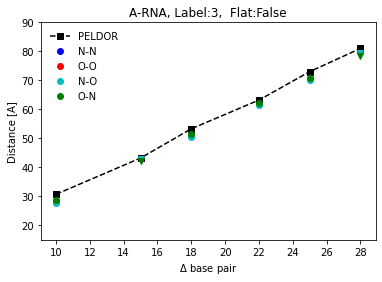

In [10]:
plt.axes().xaxis.set_major_locator(MaxNLocator(integer=True))

plt.plot(exp_id_rna_long,exp_dist_rna_long,'--ks',label="PELDOR")

plt.plot(id_rna_6,N_rna_6,'bo',label='N-N')
plt.plot(id_rna_6,O_rna_6,'ro',label='O-O')
plt.plot(id_rna_6,NO_rna_6,'co',label='N-O')
plt.plot(id_rna_6,ON_rna_6,'go',label='O-N')
plt.plot(id_rna_3,N_rna_3,'bv')
plt.plot(id_rna_3,O_rna_3,'rv')
plt.plot(id_rna_3,NO_rna_3,'cv')
plt.plot(id_rna_3,ON_rna_3,'gv')

plt.xlabel("$\Delta$ base pair")
plt.ylabel("Distance [A]")
title = f"{helix_form}-{na_type}, Label:{label},  Flat:{bp_flat}"
plt.title(title)
plt.ylim(15,90)

plt.legend(frameon=False,loc=2);

In [ ]:
pdb_file = 'helix_rna.pdb'
helix_rna_6.write_pdb(pdb_file)
helix_rna_6.write_axis_pdb()
helix_rna_6.write_center_pdb()

#First we assign the py3Dmol.view as view
view = py3Dmol.view()
#read the PDB file
view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

#Here we set the visualization style
view.setStyle({'stick': {'color':'spectrum'}})
#view.setStyle({'sphere': {'color':'spectrum'}})

#Zooming into all visualized structures 
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

## C. dsRNA of Max

In [11]:
na_type    = 'RNA' # 'DNA' or 'RNA'
helix_form = 'A' # 'B' or 'A' or 'Apr'
bs_param   = 'avg' # 'avg' or 'seq'

label      = 1

rna_type = na_type + bs_param + helix_form

bp_flat    = False # True or False

helix_rna_evn = Helix(sequence_evn_rna, rna_type, label, True)
helix_rna_odd = Helix(sequence_odd_rna, rna_type, label, False)
if not bp_flat:
    helix_rna_evn.unflat()
    helix_rna_odd.unflat()
    
evn_NN_rna, evn_OO_rna, evn_NO_rna, evn_ON_rna, evn_id_rna = labels_dist(helix_rna_evn)
odd_NN_rna, odd_OO_rna, odd_NO_rna, odd_ON_rna, odd_id_rna = labels_dist(helix_rna_odd)

[2.806791 2.810848 2.814852 2.810799 2.806791 2.810848 2.814956 2.806898
 2.814956 2.806898 2.814956 2.806898 2.814956 2.806898 2.814956 2.806898
 2.814852 2.806798 2.810848]
2.8106683567989488


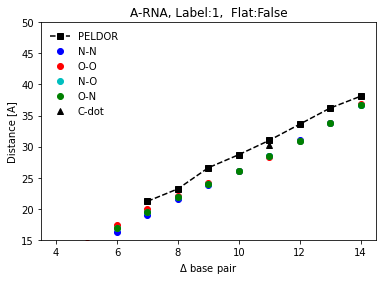

In [12]:
plt.plot(exp_id_rna,exp_dist_rna,'--ks',label="PELDOR")

plt.plot(evn_id_rna,evn_NN_rna,'bo',label='N-N')
plt.plot(evn_id_rna,evn_OO_rna,'ro',label='O-O')
plt.plot(evn_id_rna,evn_NO_rna,'co',label='N-O')
plt.plot(evn_id_rna,evn_ON_rna,'go',label='O-N')
plt.plot(odd_id_rna,odd_NN_rna,'bo')
plt.plot(odd_id_rna,odd_OO_rna,'ro')
plt.plot(odd_id_rna,odd_NO_rna,'co')
plt.plot(odd_id_rna,odd_ON_rna,'go')

plt.plot(exp_id_rna_2,exp_dist_rna_2,'^k', label="C-dot")
plt.xlabel("$\Delta$ base pair")
plt.ylabel("Distance [A]")
title = f"{helix_form}-{na_type}, Label:{label},  Flat:{bp_flat}"
plt.title(title)
plt.ylim(15,50)
plt.legend(frameon=False,loc=2);

In [ ]:
pdb_file = 'helix_rna_evn.pdb'
helix_rna_evn.write_pdb(pdb_file)
helix_rna_evn.write_axis_pdb()
helix_rna_evn.write_center_pdb()

#First we assign the py3Dmol.view as view
view = py3Dmol.view()
#read the PDB file
view.addModel(open('pdbs/' + pdb_file, 'r').read(),'pdb')
view.addModel(open('pdbs/axis.pdb', 'r').read(),'pdb')
view.addModel(open('pdbs/center.pdb', 'r').read(),'pdb')

#Here we set the visualization style
view.setStyle({'stick': {'color':'spectrum'}})
#view.setStyle({'sphere': {'color':'spectrum'}})

#Zooming into all visualized structures 
view.zoomTo()
#And we finally visualize the structures using the command below
view.show()

# 2. Vibrational anlaysis of an elastic network model

In [13]:
from utils_anm import ANM_analysis, write_pdb_modes
import numpy as np

In [ ]:
# clear contents of scratch directory 
! rm pdbs/*.*

## A. dsDNA

In [14]:
n_low = 5
scale = 0.1

### Even sequence

In [ ]:
enm_helix = helix_dna_evn

In [ ]:
eVals, eVecs = ANM_analysis(enm_helix, n_low, pdb='dna', verbose=True)

In [ ]:
NN_all, OO_all, NO_all, ON_all, idx_evn = write_pdb_modes('dna', enm_helix, 
                                                          eVecs, eVals, 
                                                          n_models=21, scale=scale)
dist_evn = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=1)
dist_evn.shape

In [ ]:
mode = 1

pdb_file = 'pdbs/dna_mode' + str(mode) + '.pdb'

with open(pdb_file) as ifile:
    system = "".join([x for x in ifile])
    
#view = py3Dmol.view(width=400, height=300)
view = py3Dmol.view()
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
#view.zoomTo()
#view.animate({'loop': "forward"})
view.animate({'loop': "backAndForth"})
view.zoomTo()
view.show()    

### Odd sequence

In [ ]:
enm_helix = helix_dna_odd

#enm_helix.write_nodes_pdb('dna')
eVals, eVecs = ANM_analysis(enm_helix, n_low, pdb=None, verbose=True)

NN_all, OO_all, NO_all, ON_all, idx_odd = write_pdb_modes('dna', enm_helix, 
                                                          eVecs, eVals, 
                                                          n_models=21, scale=scale)
dist_odd = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=1)
dist_odd.shape

In [ ]:
dist_modes = np.concatenate([dist_evn,dist_odd],axis=-1)
idx_all = np.concatenate([idx_evn,idx_odd],axis=-1)
dist_modes.shape

In [ ]:
dist_all = np.concatenate([dist_modes[0],dist_modes[1],
                           dist_modes[2],dist_modes[3],dist_modes[4]],
                          axis=0)
dist_all.shape

In [ ]:
import pandas as pd
import seaborn as sns
from scipy.stats import norm, expon, cauchy

In [ ]:
sns.set(style="white")
f, ax = plt.subplots(1,1,figsize=(12,8))

df_dist = pd.DataFrame(
        data = dist_all,
        columns = idx_all
    )

sns.histplot(data=df_dist, element="poly", binwidth=.33, kde=False, stat='probability');

In [ ]:
sns.set(style="white")
#df_NN.plot.hist(subplots=True, legend=False, layout=(1, 4));
f, axes = plt.subplots(n_low,1,figsize=(10,15))
for l in range(n_low):
    df_dist = pd.DataFrame(
        data = dist_modes[l],
        columns = idx_all
    )    
    sns.histplot(data=df_dist, binwidth=0.5, stat='probability',element="poly",kde=False,ax=axes[l])

for ax in axes:
    ax.legend([],[], frameon=False)
    #ax.set_ylim(0,100)

## B. dsRNA  of Halbmair

In [ ]:
enm_helix = helix_rna_6

eVals, eVecs = ANM_analysis(enm_helix, n_low, pdb='rna', verbose=True)

NN_all, OO_all, NO_all, ON_all, idx_6 = write_pdb_modes('rna_6', enm_helix, 
                                                          eVecs, eVals, 
                                                          n_models=21, scale=scale)
dist_6 = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=1)
dist_6.shape

In [ ]:
mode = 3

pdb_file = 'pdbs/rna_6_mode' + str(mode) + '.pdb'

with open(pdb_file) as ifile:
    system = "".join([x for x in ifile])
    
#view = py3Dmol.view(width=400, height=300)
view = py3Dmol.view()
view.addModelsAsFrames(system)
view.setStyle({'model': -1}, {"stick": {'color': 'spectrum'}})
#view.zoomTo()
#view.animate({'loop': "forward"})
view.animate({'loop': "backAndForth"})
view.zoomTo()
view.show()  

In [ ]:
enm_helix = helix_rna_3

eVals, eVecs = ANM_analysis(enm_helix, n_low, pdb=None, verbose=True)

NN_all, OO_all, NO_all, ON_all, idx_3 = write_pdb_modes('rna_3', enm_helix, 
                                                          eVecs, eVals, 
                                                          n_models=21, scale=scale)
dist_3 = np.concatenate([NN_all,OO_all,NO_all,ON_all],axis=1)
dist_3.shape

In [ ]:
dist_modes = np.concatenate([dist_6,dist_3],axis=-1)
idx_all = np.concatenate([idx_6,idx_3],axis=-1)
dist_modes.shape

dist_all = np.concatenate([dist_modes[0],dist_modes[1],
                           dist_modes[2]],axis=0)
dist_all.shape

In [ ]:
sns.set(style="white")
f, ax = plt.subplots(1,1,figsize=(12,8))

df_dist = pd.DataFrame(
        data = dist_all,
        columns = idx_all
    )

sns.histplot(data=df_dist, element="poly", binwidth=.33, kde=False);
#ax.legend([],[], frameon=False)

### Get Euler angles between each spin label and the first one

In [ ]:
#from utils_peldor import labels_orientation
#from scipy.spatial.transform import Rotation as R

In [ ]:
#rots, odd_id_rna = labels_orientation(helix_rna_odd)
#for i in range(len(odd_id_rna)):
#    r = R.from_matrix(rots[i])
#    print(r.as_euler('zyx', degrees=True))